In [8]:
'''
Name : Raghav Sonavane
Roll No: 14EC35002

Assignment 1b
'''

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df= pd.read_csv('Iris_Data.csv')
df.head()

'''
You will not import any other library other than these provided.

We provide the iris_dataset for the classification task
There are 4 dependent variables columns(1-4).
The last column (category of the flower) is what we wish to predict

The first part of this task is similar to assignment 1 a
'''
# reads the file and stores in 2 numpy arrays.
# X has the input features and Y has the output value in numpy array

X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

rows,cols= X.shape 
# how to get the number of rows and columns in the dataset.
# Rows correspond to the number of input instances, columns correspond to the feature of an input

print(rows,cols)

np.random.seed(42) # to ensure that the same seed is generated

# write code to shuffle the dataset

def shuffle_dataset(X,Y):
    
    '''
        Write code to shuffle the dataset here. 
        
        Args: 
            X: Input feature ndarray
            Y: Input values ndarray
            
        Return:
            X and Y shuffled in place
    
    '''
    ind = [ i for i in range(rows)]
    np.random.shuffle(ind)
    X = X[ind]
    Y = Y[ind]
    Y = Y.reshape(-1,1)
    return (X,Y)

X,Y = shuffle_dataset(X,Y)
training_size = int(0.8*rows)
X_train = X[:training_size]
y_train = Y[:training_size]
X_test = X[training_size:]
y_test = Y[training_size:]

150 4


## Defining the Feed Forward Neural Network class

In [18]:
class NeuralNetwork(object):
    
    def __init__(self, input_no, hidden_no, output_no ):
        '''
            Initialize the Neural network model 
            Args:
                input_no : no of input features (no of cols)
                hidden_no: no of hidden nodes in the model
                output_no: no of categories our model can classify
                      
        
        '''
        self.h=  np.zeros((hidden_no,training_size))# Initialize the hidden layer with zero ?
        self.w1= np.random.uniform(low = 0, high = 0.01, size = (hidden_no,input_no))# Initialize the weights from the input to the hidden layer uniformly with values between 0 and 0.01  ?
        self.b1= np.random.uniform(low = 0, high = 0.01, size = (hidden_no,1))# Initialize the biases uniformly with values between 0 and 0.01 equal to the number of hidden nodes  ?
        self.w2= np.random.uniform(low = 0, high = 0.01, size = (output_no,hidden_no))# Initialize the weights from the hidden layer to the output uniformly with values between 0 and 0.01 ? 
        self.b2= np.random.uniform(low = 0, high = 0.01, size = (output_no,1))# Initialize the biases uniformly with values between 0 and 0.01 equal to the number of output categories ?
        pass
    
    def forward(self, x):
        '''
            Do a forward pass on the NN model 
            Args: 
                x : Input feature matrix 
                
            Return:
                y_pred : list of predicted probabilities of x

                h= relu(w1.x+b1) 
                
                y_pred = softmax(w2.h+b2)
                
        
        '''
        self.h = np.maximum(0.0,np.dot(self.w1,x.T)+self.b1)
        tmp = np.dot(self.w2,self.h)+self.b2
        y_pred = np.exp(tmp)/np.sum(np.exp(tmp),axis=0)
        #print(y_pred.shape)
        return y_pred.T

    
    def backward(self, x, y_train, y_pred, lr):
        
        '''
            Do a backward pass on the NN model. 
            Computes all gradients and updates the parameters w1, b1, w2, b2
            
            Args:
                x: input matrix X 
                y_train: actual category of the feature/ data point
                y_pred: predicted probabilities of the categories obtained during forward pass
                lr: learning rate        
        '''
                                   
        r=y_train.shape[0]
        out_class = np.eye(3)[y_train.reshape(-1)] 
        
        #gradients for weights between final layer and hidden layer
        out2hidden = (y_pred-out_class).T
        tmp = np.dot(out2hidden,self.h.T)
        
        #gradients for weights between hidden layer and input
        hidden2input = np.dot(self.w2.T,out2hidden)
        derivative=np.zeros_like(self.h)
        derivative[self.h>0]=1
        derivative=derivative*hidden2input
        
        #weight update step for w1 and w2
        self.w2 = self.w2-(lr/r)*tmp
        tmp=np.dot(derivative,x)
        self.b2= self.b2-(lr/r)*(out2hidden.sum(axis=1).reshape(-1,1))
        self.w1 = self.w1-(lr/r)*tmp
        self.b1 = self.b1-(lr/r)*(derivative.sum(axis=1).reshape(-1,1))
        pass

        
def crossEntropy_loss(y_pred, y_train):
    '''
        Computes the cross entropy loss between the predicted values and the actual values
        
        Args:
            y_pred: predicted probabilities of the categories obtained during forward pass
            y_train: actual category of the feature/ data point
    
    '''
    
    r=y_train.shape[0]
    out_class = np.eye(3)[y_train.reshape(-1)] 
    loss = -1*np.average(np.log(y_pred[out_class==1]))
    return loss
                                   
def accuracy(y_pred,y_train):
    '''
        Computes the accuracy between the predicted values and actual labels
    
        Args:
            y_pred: predicted probabilities of the categories obtained during forward pass
            y_train: actual category of the feature/ data point

    '''
    pred_labels =np.argmax(y_pred,axis=1).reshape(-1,1)
#     print(pred_labels)
#     print(y_train)
    acc=(pred_labels==y_train).mean()
    print(acc)
    return acc*100
    
        


0.9666666666666667
1.0


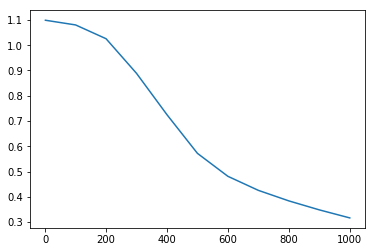

Final train_loss 0.31645572634216407
Final train_accuracy 96.66666666666667
Testloss 0.34476442156980663
Accuracy is 100.0


In [19]:
# Initialize the neural network model and specify the parameters 
hidden_nodes = 256 #hyperparameter
lmda = 0
nnobj= NeuralNetwork(cols,hidden_nodes,3)       
epochs = 1000
learning_rate = 1e-2
loss_history = []
epoch_history = []

# Gradient Descent
for e in range(epochs):
    yPred= nnobj.forward(X_train)
    if e==0 or (e+1)%100==0:
        loss_history.append(crossEntropy_loss(yPred, y_train))
        epoch_history.append(e+1)
    nnobj.backward(X_train, y_train, yPred, lr=learning_rate)
    
train_loss= crossEntropy_loss(nnobj.forward(X_train) , y_train)
train_accuracy= accuracy(nnobj.forward(X_train) , y_train)
test_loss= crossEntropy_loss(nnobj.forward(X_test) , y_test)
test_accuracy= accuracy(nnobj.forward(X_test) , y_test)

plt.plot(epoch_history, loss_history)
plt.show()

print("Final train_loss "+ str(train_loss))    
print("Final train_accuracy "+ str(train_accuracy))    
print("Testloss " + str(test_loss))
print("Accuracy is "+ str(test_accuracy))

        
            